In [ ]:
import osmnx as ox
import networkx as nx
import time
import random
import matplotlib.pyplot as plt
import pandas as pd
import time

In [ ]:
# Max_Min Ant System Algorithm with mTSPs

def MMACS_TSP(G, school, all_nodes, initial_pheromone, colony_size, alpha, beta, p, node_num, min_scaling_factor, Q):
    # all_nodes: all the stops and school nodes(osmid)list, school node should be put at all_nodes[0] as source node
    # p: trail persistance
    routes = []  # lists of lists(100 routes)
    total_distance = []
    start_time = time.time() ## Records current time
    
    # Set initial pheromone concentration as the same
    pheromone_concentration = dict()
    for i in range(node_num):
        for j in range(node_num):
            if i != j :
                pheromone_concentration[(all_nodes[i], all_nodes[j])] = initial_pheromone
        
    for ant in range(colony_size):
        # Put an ant on the school node
        c_node = [school]   # saving the node that ant choose each iteration
        explored = []
        route = []  
        best_distance_sum = 0 # the sum route distance for each ant
        unvisited_nodes = all_nodes[1:]
    
        while c_node and len(explored) < node_num:
            current_node = c_node.pop(0)
            explored.append(current_node)

            # If current node is the last stop, just return school
            if len(explored) == node_num:
                route.extend(ox.shortest_path(G, current_node, school))
                iteration_best_distance = nx.shortest_path_length(G, current_node, school, weight='length')
                best_distance_sum += iteration_best_distance
            else: 

                # The numerator for transition probability
                numerator_prob = [] 
                for node in unvisited_nodes:              
                    numerator_prob.append(pow(pheromone_concentration[(current_node, node)], alpha) * pow((1/nx.shortest_path_length(G, current_node, node, weight='length')), beta))
            
                # Computing the transition probability 
                transitionProbability = []
                for numerator in numerator_prob:
                    transitionProbability.append(numerator/sum(numerator_prob)) 
                
                # Select the next node randomly, node with higher transition probability is more likely to be selected
                choosen = random.choices(unvisited_nodes, weights = transitionProbability, k = 1)[0]     
                # Add route (from current_node to choosen)
                c_node.insert(0, choosen)
                
                
                bf_choosen = nx.shortest_path(G, current_node)[choosen][-2] # to avoid orig/dest nodes duplicate
                route.extend(ox.shortest_path(G, current_node, bf_choosen))
            
                # Caculate the route and distance btween current_node and choosen, update unvisited_node 
                best_distance = nx.shortest_path_length(G, current_node, choosen, weight='length')
                best_distance_sum += best_distance
                unvisited_nodes.remove(choosen) # Remove the next node from the unvisited_node set
        
        # Pheromone evaporation
        for i in range(node_num):
            for j in range(node_num):
                if i != j :
                    pheromone_concentration[(all_nodes[i], all_nodes[j])] = pheromone_concentration[(all_nodes[i], all_nodes[j])] * p
        
        # Update pheromone
        for i in range(node_num - 1):
            pheromone_concentration[(explored[i], explored[i + 1])] += Q / best_distance_sum
            
        # Min Max: set the pheromone concentration within min max values
        max_pheromone = (1 / (1 - p)) * (Q / best_distance_sum)
        min_pheromone = max_pheromone * min_scaling_factor
        for i in range(node_num):
            for j in range(node_num):
                if i != j :
                    if pheromone_concentration[(all_nodes[i], all_nodes[j])] > max_pheromone:
                        pheromone_concentration[(all_nodes[i], all_nodes[j])] = max_pheromone
                    elif pheromone_concentration[(all_nodes[i], all_nodes[j])] < min_pheromone:
                        pheromone_concentration[(all_nodes[i], all_nodes[j])] = min_pheromone
                           
        # Save the total distance and the corresponding route for each ant
        routes.append(route)
        total_distance.append(best_distance_sum)
    
    end_time = time.time() # End time after for loop(colony size)
    t = end_time - start_time
    
    return routes, total_distance, t

Plot the map around North Toronto Christian School and get the nearest node id of the school.

In [ ]:
# Plot the map with north toronto christian school in the center
G = ox.graph_from_point(north_toronto_chris_school, dist=3500, network_type='drive', clean_periphery=True, simplify=True)
north_toronto_chris_school = (43.7734184458907, -79.3368615141682)
# Get the nearest node id of north toronto christian school
ox.distance.get_nearest_node(G, north_toronto_chris_school)

267467317

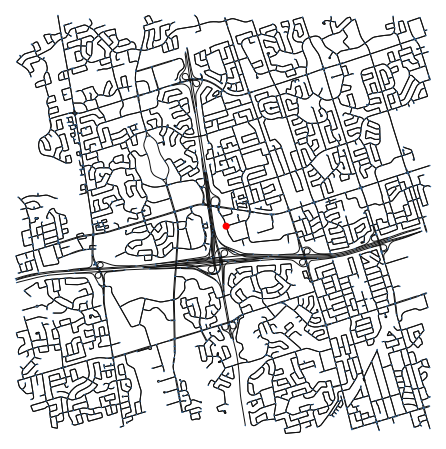

In [ ]:
nc = ['r' if node == 267467317 else '#336699' for node in G.nodes()]
ns = [50 if node == 267467317 else 2 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2, bgcolor='w',edge_color='#111111')

North toronto christian school route 1: Set all the parameters and call the Max-Min Ant System Algorithm function below to get the routes and their corresponding route length

In [ ]:
# North toronto christian school route1
school = 267467317
df1 = pd.read_excel (r'North toronto christian school_route1.xlsx')
all_nodes1 = list(df1.iloc[0:, 0].values)
initial_pheromone1 = 1
colony_size1 = 100
alpha1 = 1.0
beta1 = 3.0
p1 = 0.8
node_num1 = 10
min_scaling_factor1 = 0.001
Q1 = 20

In [ ]:
routes1, total_distance1, t1 = MMACS_TSP(G, school, all_nodes1, initial_pheromone1, colony_size1, alpha1, beta1, p1, node_num1, min_scaling_factor1, Q1)

The shortest length of the route is: 13613.958 meters


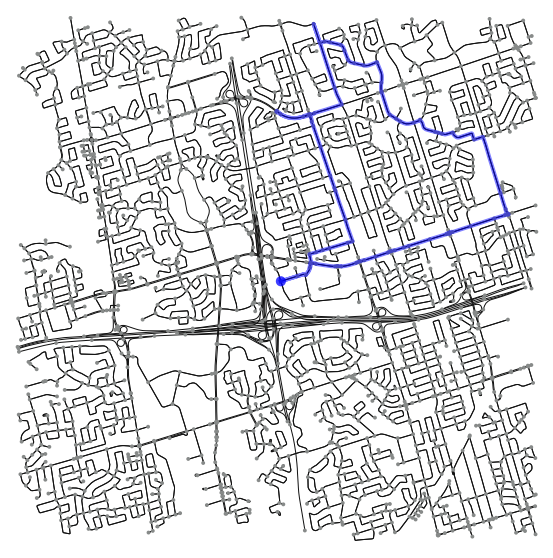

In [ ]:
shortest_route1 = routes1[-1]
shortest_distance1 = total_distance1[-1]
print('The shortest length of the route is:', shortest_distance1, 'meters')
fig, ax = ox.plot_graph_route(G, shortest_route1, figsize=(10, 10), route_color = 'b', bgcolor='w',edge_color='#111111', node_color='#878a89')

Plot number of ants(generations) vs. total route length.

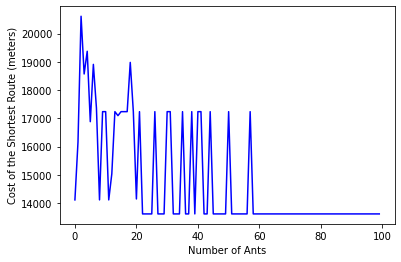

In [ ]:
# test if the algorithm converge
plt.xlabel("Number of Ants")
plt.ylabel("Cost of the Shortest Route (meters)")
plt.plot(total_distance1, color = 'b')
plt.show()

North toronto christian school route 2

In [ ]:
# North toronto christian school route2
school = 267467317
df2 = pd.read_excel (r'North toronto christian school_route2.xlsx')
all_nodes2 = list(df2.iloc[0:, 0].values)
initial_pheromone2 = 1
colony_size2 = 100
alpha2 = 1.0
beta2 = 3.0
p2 = 0.7
node_num2 = 10
min_scaling_factor2 = 0.001
Q2 = 30

In [ ]:
routes2, total_distance2, t2 = MMACS_TSP(G, school, all_nodes2, initial_pheromone2, colony_size2, alpha2, beta2, p2, node_num2, min_scaling_factor2, Q2)

The shortest length of route 2 is: 18110.525999999998 meters


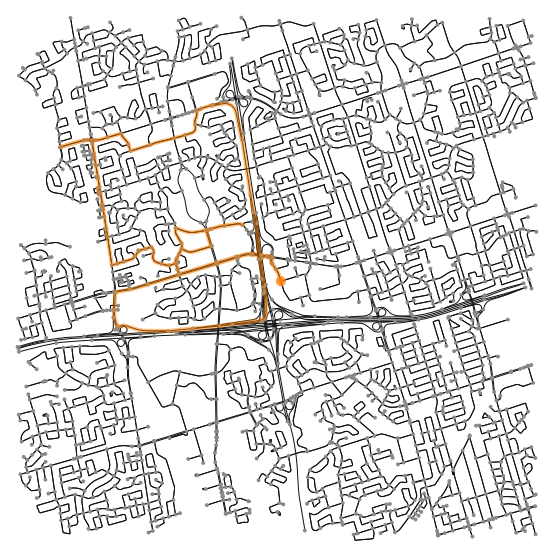

In [ ]:
shortest_route2 = routes2[-1]
shortest_distance2 = total_distance2[-1]
print('The shortest length of route 2 is:', shortest_distance2, 'meters')
fig, ax = ox.plot_graph_route(G, shortest_route2,route_color='#ff8000', figsize=(10, 10), bgcolor='w',edge_color='#111111', node_color='#878a89')

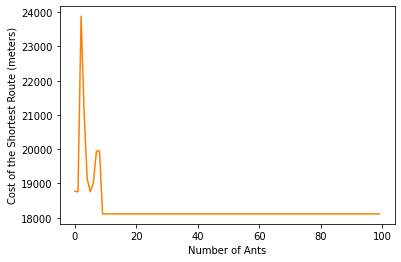

In [ ]:
# test if the result converge
plt.xlabel("Number of Ants")
plt.ylabel("Cost of the Shortest Route (meters)")
plt.plot(total_distance2, color = '#ff8000')
plt.show()

North toronto christian school route 3

In [ ]:
# North toronto christian school route3
school = 267467317
df3 = pd.read_excel (r'North toronto christian school_route3.xlsx')
all_nodes3 = list(df3.iloc[0:, 0].values)
initial_pheromone3 = 1
colony_size3 = 100
alpha3 = 1.0
beta3 = 3.0
p3 = 0.8
node_num3 = 10
min_scaling_factor3 = 0.001
Q3 = 20

In [ ]:
routes3, total_distance3, t3 = MMACS_TSP(G, school, all_nodes3, initial_pheromone3, colony_size3, alpha3, beta3, p3, node_num3, min_scaling_factor3, Q3)

The shortest length of route 3 is: 13140.822 meters


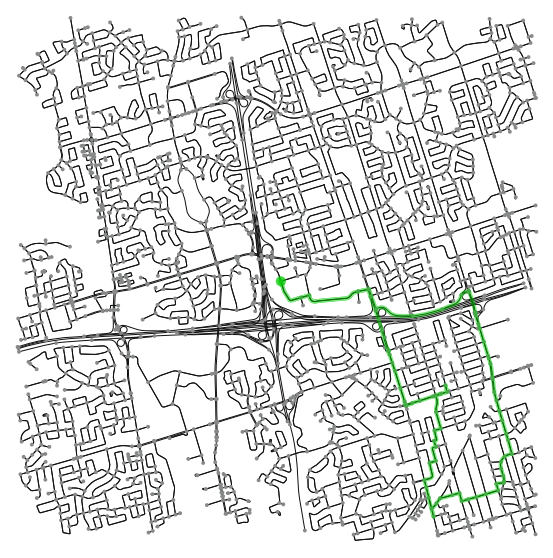

In [ ]:
shortest_route3 = routes3[-1]
shortest_distance3 = total_distance3[-1]
print('The shortest length of route 3 is:', shortest_distance3, 'meters')
fig, ax = ox.plot_graph_route(G, shortest_route3, route_color='#00cc00', figsize=(10, 10), bgcolor='w',edge_color='#111111', node_color='#878a89')

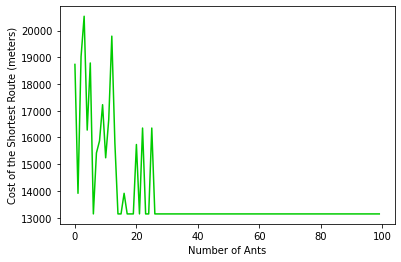

In [ ]:
# test if the result converge
plt.xlabel("Number of Ants")
plt.ylabel("Cost of the Shortest Route (meters)")
plt.plot(total_distance3, color = '#00cc00')
plt.show()

Plot the three routes that we obtained above in one graph together.

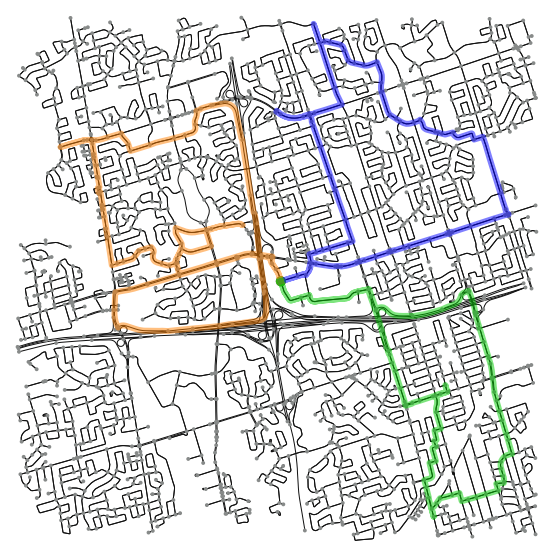

In [ ]:
shortest_route_list = []
shortest_route_list.append(shortest_route1)
shortest_route_list.append(shortest_route2)
shortest_route_list.append(shortest_route3)
fig, ax = ox.plot_graph_routes(G, shortest_route_list, route_colors=['b', '#ff8000', '#00cc00'],route_linewidth=6, figsize=(10, 10), bgcolor='w',edge_color='#111111', node_color='#878a89')

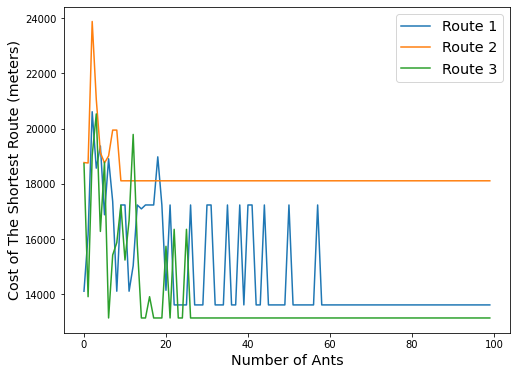

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel("Number of Ants", fontsize = 'x-large')
plt.ylabel("Cost of The Shortest Route (meters)", fontsize = 'x-large')
plt.plot(total_distance1, label='Route 1')
plt.plot(total_distance2, label='Route 2')
plt.plot(total_distance3, label='Route 3')
plt.legend(fontsize = 'x-large')
plt.show()

Run the algorithm with colony size equals to 20, 40, 60, 80 and get their corresponding run time, plot them in a graph

In [ ]:
# route1
t1_list = []
colony_size_list = [20, 40, 60, 80, 100]
for colony_size in colony_size_list:
    routes, total_distance, t1 = MMACS_TSP(G, school, all_nodes1, initial_pheromone1, colony_size, alpha1, beta1, p1, node_num1, min_scaling_factor1, Q1)
    t1_list.append(t1)

# route2
t2_list = []
for colony_size in colony_size_list:
    routes, total_distance, t2 = MMACS_TSP(G, school, all_nodes2, initial_pheromone2, colony_size, alpha2, beta2, p2, node_num2, min_scaling_factor2, Q2)
    t2_list.append(t2)

# route3
t3_list = []
for colony_size in colony_size_list:
    routes, total_distance, t3 = MMACS_TSP(G, school, all_nodes3, initial_pheromone3, colony_size, alpha3, beta3, p3, node_num3, min_scaling_factor3, Q3)
    t3_list.append(t3)

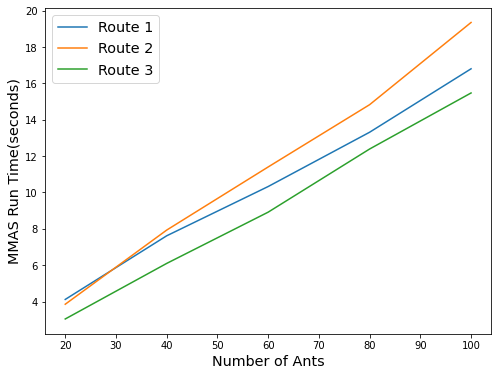

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel("Number of Ants", fontsize = 'x-large')
plt.ylabel("MMAS Run Time(seconds)", fontsize = 'x-large')
plt.plot(colony_size_list, t1_list, label = 'Route 1')
plt.plot(colony_size_list, t2_list, label = 'Route 2')
plt.plot(colony_size_list, t3_list, label = 'Route 3')
plt.legend(fontsize = 'x-large')
plt.show()